### Want to look at how long some trial intervals are, especially when they're variable, across all sessions:
- how long from stimulus on to selection (decision making time?)
- how is that as a function of feature entropy?
- how long between cross fixation on and stimulus on? (this should be fixed)
                                        

### Conclusions: 
- Decision time, as well as fixation time vary as a function of feature entropy
- lower entropy, more higher prob of correct (inuitive)
- lower decision time, higher prob of correct
- lower entropy, faster decision time, faster fixation time

In [1]:
%load_ext autoreload
%autoreload 2

import os
import numpy as np
import pandas as pd
import utils.behavioral_utils as behavioral_utils
import utils.information_utils as information_utils
import utils.visualization_utils as visualization_utils
import utils.glm_utils as glm_utils
from matplotlib import pyplot as plt
import utils.spike_utils as spike_utils
from constants.glm_constants import *
from constants.behavioral_constants import *

import seaborn as sns

### get all behavior

In [2]:
num_bins = 10

def get_sess_beh(row, beh_path):
    session = row.session_name
    behavior_path = beh_path.format(sess_name=session)
    beh = pd.read_csv(behavior_path)

    # filter trials 
    valid_beh = behavioral_utils.get_valid_trials(beh)
    feature_selections = behavioral_utils.get_selection_features(valid_beh)
    valid_beh = pd.merge(valid_beh, feature_selections, on="TrialNumber", how="inner")
    beh = behavioral_utils.get_feature_values_per_session(session, valid_beh)
    beh = behavioral_utils.get_relative_block_position(beh, num_bins)
    beh = behavioral_utils.get_max_feature_value(beh, num_bins)
    beh = behavioral_utils.calc_feature_probs(beh)
    beh = behavioral_utils.calc_feature_value_entropy(beh)
    beh = behavioral_utils.calc_confidence(beh, num_bins, quantize_bins=True)
    beh["session"] = session
    return beh

In [3]:
# Monkey S
SESSIONS_PATH = "/data/patrick_res/sessions/valid_sessions_rpe.pickle"
sessions = pd.read_pickle(SESSIONS_PATH)
beh_path = SESS_BEHAVIOR_PATH
res = pd.concat(sessions.apply(lambda x: get_sess_beh(x, beh_path), axis=1).values)
res["CombinedIdx"] = np.arange(len(res))


In [14]:
res.columns

Index(['index', 'TrialNumber', 'BlockNumber', 'TrialAfterRuleChange',
       'TaskInterrupt', 'ConditionNumber', 'Response', 'ItemChosen',
       'TrialType', 'CurrentRule', 'LastRule', 'ShiftType', 'Perseveration',
       'TrialStart', 'FixCrossOn', 'FixationOnCross', 'FixRequireEnd',
       'StimOnset', 'FeedbackEncode', 'FeedbackOnset', 'TrialEnd',
       'Item0_xPos', 'Item0_yPos', 'Item1_xPos', 'Item1_yPos', 'Item2_xPos',
       'Item2_yPos', 'Item3_xPos', 'Item3_yPos', 'Item0Shape', 'Item0Color',
       'Item0Pattern', 'Item1Shape', 'Item1Color', 'Item1Pattern',
       'Item2Shape', 'Item2Color', 'Item2Pattern', 'Item3Shape', 'Item3Color',
       'Item3Pattern', 'Color', 'Shape', 'Pattern', 'trial', 'CIRCLEValue',
       'SQUAREValue', 'STARValue', 'TRIANGLEValue', 'CYANValue', 'GREENValue',
       'MAGENTAValue', 'YELLOWValue', 'ESCHERValue', 'POLKADOTValue',
       'RIPPLEValue', 'SWIRLValue', 'MaxFeat', 'BlockLength', 'TrialInBlock',
       'BlockPosition', 'BlockPositionBin',

In [5]:
# res.reset_index(drop=True)
res

,index,TrialNumber,BlockNumber,TrialAfterRuleChange,TaskInterrupt,ConditionNumber,Response,ItemChosen,TrialType,CurrentRule,...,YELLOWProb,ESCHERProb,POLKADOTProb,RIPPLEProb,SWIRLProb,FeatEntropy,Confidence,ConfidenceBin,session,CombinedIdx
0,0,49,2,0,NaN,2258,Incorrect,2.0,11,SQUARE,...,0.083333,0.083333,0.083333,0.083333,0.083333,2.484907,0.000000,0,20180709,0
1,1,50,2,1,NaN,1881,Incorrect,2.0,11,SQUARE,...,0.083333,0.083333,0.083333,0.083333,0.083333,2.484907,0.000000,0,20180709,1
2,2,51,2,2,NaN,2206,Incorrect,3.0,11,SQUARE,...,0.083333,0.083333,0.083333,0.083333,0.083333,2.484907,0.000000,0,20180709,2
3,3,52,2,3,NaN,2005,Correct,0.0,11,SQUARE,...,0.083333,0.083333,0.083333,0.083333,0.083333,2.484907,0.000000,0,20180709,3
4,4,53,2,4,NaN,1834,Correct,0.0,11,SQUARE,...,0.079458,0.079458,0.079458,0.079458,0.094959,2.481756,0.128205,0,20180709,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,853,876,26,13,NaN,2654,Correct,0.0,4,CYAN,...,0.067913,0.078985,0.084317,0.084912,0.074872,2.471177,0.590647,7,20180910,28008
854,854,877,26,14,NaN,2557,Correct,0.0,4,CYAN,...,0.067876,0.078213,0.083159,0.086969,0.074384,2.469843,0.648418,8,20180910,28009
855,855,878,26,15,NaN,2696,Correct,0.0,4,CYAN,...,0.067924,0.077591,0.082187,0.085717,0.075868,2.468564,0.703804,8,20180910,28010
856,856,879,26,16,NaN,2567,Correct,0.0,4,CYAN,...,0.067839,0.079616,0.081130,0.084396,0.075260,2.467049,0.769552,9,20180910,28011


### What is distribution of decision times? 

In [31]:
res["DecisionTime"] = res.FeedbackOnset - 800 - res.StimOnset

Text(0.5, 1.0, 'Hist of decision times (stimulus onset to start of card fixation), median 570.000')

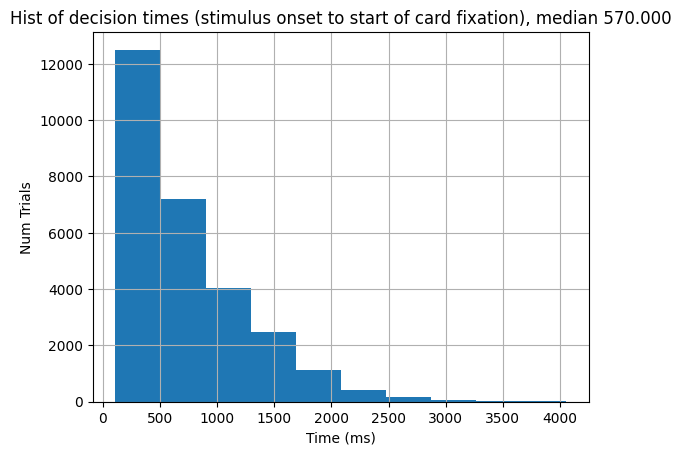

In [32]:
fig, ax = plt.subplots()
res.DecisionTime.hist(ax=ax)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Num Trials")
ax.set_title(f"Hist of decision times (stimulus onset to start of card fixation), median {res.DecisionTime.median():.3f}")

### What is the probability of correct as a function of decision time quantiles?

In [33]:
res["DecisionTimeBin"] = pd.qcut(res["DecisionTime"], 20, labels=False)

In [34]:
def calc_prob_correct(group):
    return len(group[group.Response == "Correct"]) / len(group)
prob_correct = res.groupby("DecisionTimeBin", group_keys=False).apply(calc_prob_correct).reset_index(name='ProbCorrect')

<Axes: xlabel='DecisionTimeBin', ylabel='ProbCorrect'>

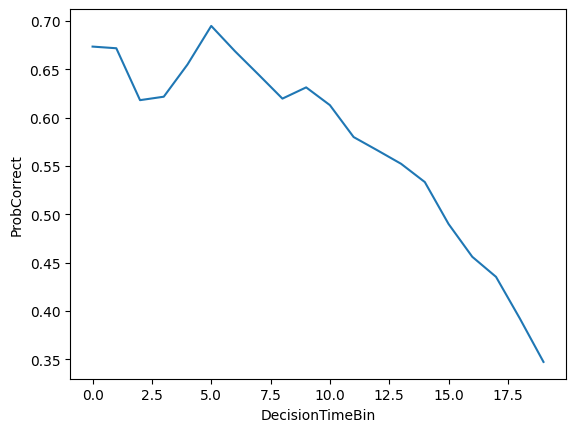

In [35]:
sns.lineplot(prob_correct, x="DecisionTimeBin", y="ProbCorrect")

### What is prob correct as a func of feature entropy?

In [36]:
def calc_prob_correct(group):
    return len(group[group.Response == "Correct"]) / len(group)
prob_correct = res.groupby("ConfidenceBin", group_keys=False).apply(calc_prob_correct).reset_index(name='ProbCorrect')

Text(0, 0.5, 'Probability of correct choice')

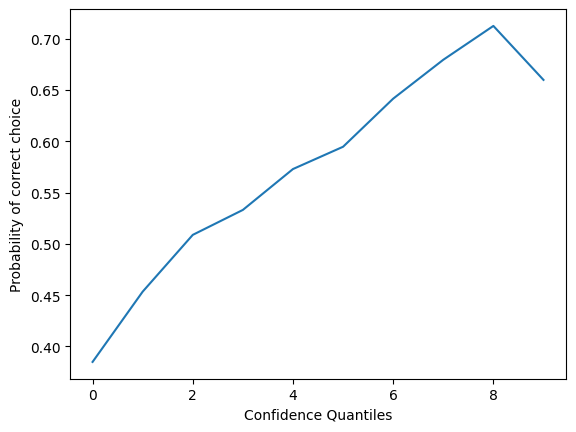

In [46]:
fig, ax = plt.subplots()
sns.lineplot(prob_correct, x="ConfidenceBin", y="ProbCorrect", ax=ax)
ax.set_xlabel("Confidence Quantiles")
ax.set_ylabel("Probability of correct choice")

### Proportion of trials that have a decision time faster than 500ms?

In [38]:
res.DecisionTime.quantile(0.25)

333.0

In [39]:
res.groupby("Response").nunique()

,index,TrialNumber,BlockNumber,TrialAfterRuleChange,TaskInterrupt,ConditionNumber,ItemChosen,TrialType,CurrentRule,LastRule,...,POLKADOTProb,RIPPLEProb,SWIRLProb,FeatEntropy,Confidence,ConfidenceBin,session,CombinedIdx,DecisionTime,DecisionTimeBin
Response,,,,,,,,,,,,,,,,,,,,,
Correct,1559,1585,53,140,2,5832,1,12,12,11,...,16054,16054,16054,16054,16050,10,27,16080,1958,20
Incorrect,1503,1530,53,129,1,5275,3,12,12,11,...,11805,11805,11805,11805,11784,10,27,11933,2237,20


### How do decision times vary as a func of feature entropy?

Text(0, 0.5, 'Decision Time (ms)')

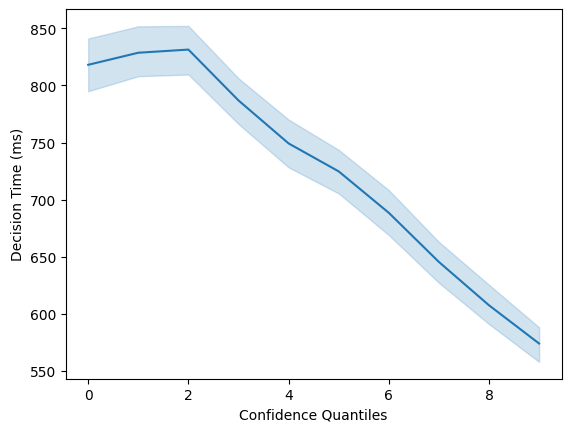

In [45]:
fig, ax = plt.subplots()
sns.lineplot(res, x="ConfidenceBin", y="DecisionTime", ax=ax)
ax.set_xlabel("Confidence Quantiles")
ax.set_ylabel("Decision Time (ms)")

### After cross fixation, how long does it take for cards to appear?

Text(0.5, 1.0, 'From FixationOnCross to StimOnset, Mean: 522.078')

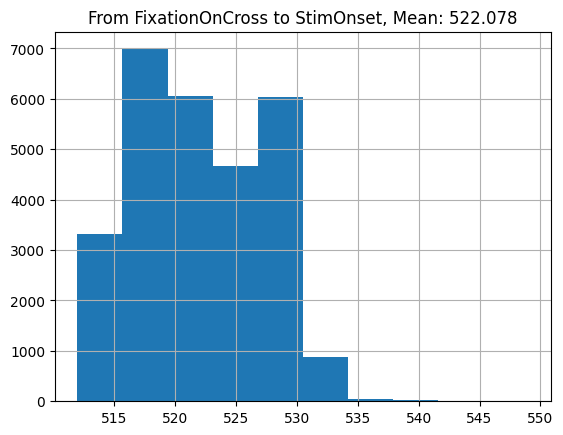

In [12]:
res["CardsAppearTime"] = res.StimOnset - res.FixationOnCross
fig, ax = plt.subplots()
res.CardsAppearTime.hist(ax=ax)
ax.set_title(f"From FixationOnCross to StimOnset, Mean: {res.CardsAppearTime.mean():.3f}")

### How long does it take for cross to appear after trial start?

Text(0.5, 1.0, 'From TrialStart to FixCrossOn, Mean: 96.906')

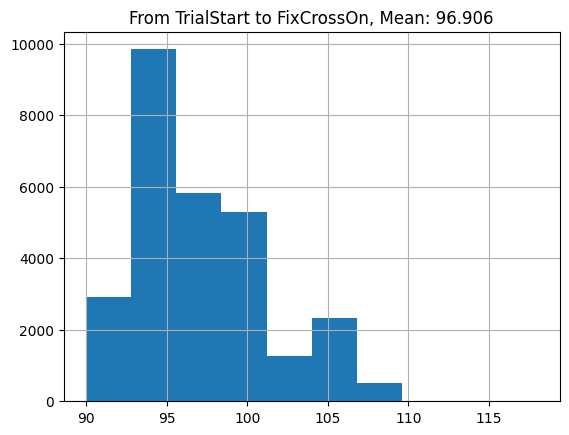

In [13]:
res["CrossAppearTime"] = res.FixCrossOn - res.TrialStart
fig, ax = plt.subplots()
res.CrossAppearTime.hist(ax=ax)
ax.set_title(f"From TrialStart to FixCrossOn, Mean: {res.CrossAppearTime.mean():.3f}")

Text(0.5, 1.0, 'From FixCrossOn to FixationOnCross, Mean: 225.253')

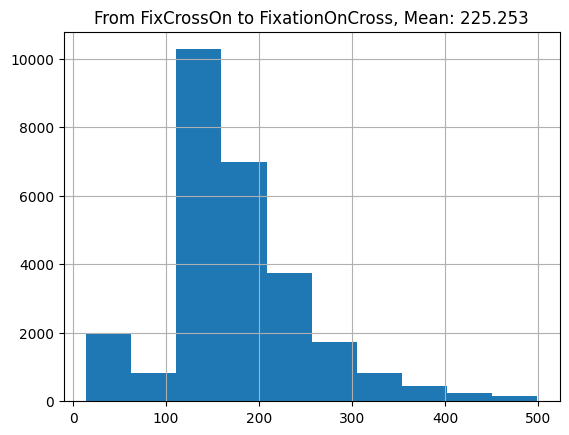

In [14]:
res["TimeToCrossFixate"] = res.FixationOnCross - res.FixCrossOn
fig, ax = plt.subplots()
res[res.TimeToCrossFixate < 500].TimeToCrossFixate.hist(ax=ax)
ax.set_title(f"From FixCrossOn to FixationOnCross, Mean: {res.TimeToCrossFixate.mean():.3f}")

Text(0.5, 1.0, 'Time to start fixating on cross (all times)')

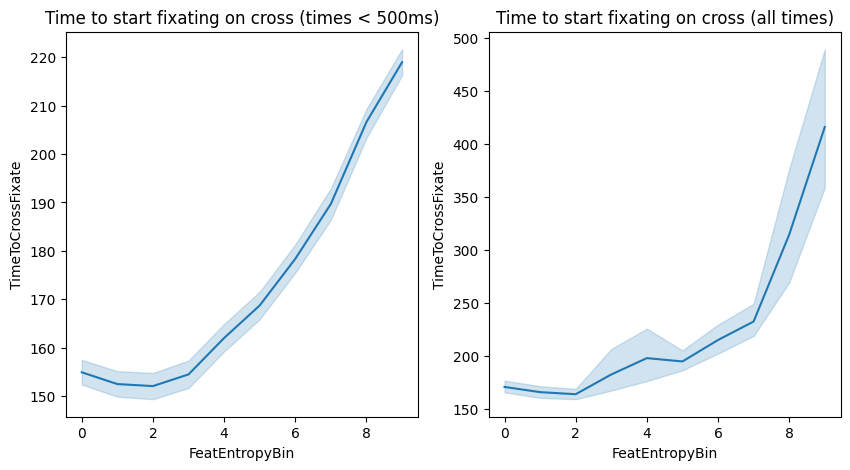

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
ax = axs[0]
sub_res = res[res.TimeToCrossFixate < 500]
sns.lineplot(sub_res, x="FeatEntropyBin", y="TimeToCrossFixate", ax=ax)
ax.set_title("Time to start fixating on cross (times < 500ms)")

ax = axs[1]
sns.lineplot(res, x="FeatEntropyBin", y="TimeToCrossFixate", ax=ax)
ax.set_title("Time to start fixating on cross (all times)")
# ax.set_title("Decision time varies as function of feature entropy")

### What is the proportion of trials where the highest valued feature is also chosen? (model probably get it right)

Ans: 
- 61% of trials have max feat chosen

In [4]:
def get_max_feat_chosen(row):
    dim = FEATURE_TO_DIM[row.MaxFeat]
    return row[dim] == row.MaxFeat
res["MaxFeatChosen"] = res.apply(get_max_feat_chosen, axis=1)

<Axes: xlabel='ConfidenceBin', ylabel='ProbMaxFeatChosen'>

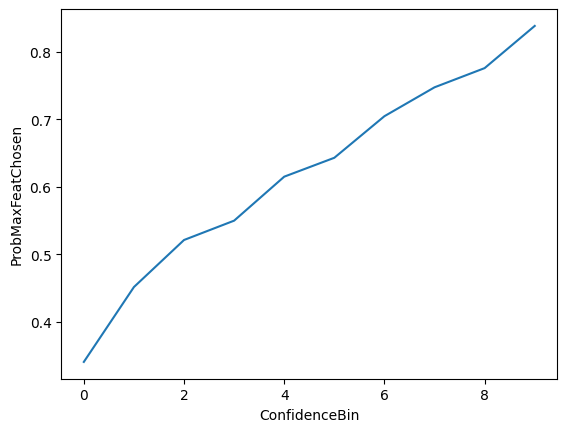

In [5]:
def calc_prob_max_feat_chosen(group):
    return len(group[group.MaxFeatChosen]) / len(group)
prob_max_feat_chosen = res.groupby("ConfidenceBin", group_keys=False).apply(calc_prob_max_feat_chosen).reset_index(name='ProbMaxFeatChosen')
sns.lineplot(prob_max_feat_chosen, x="ConfidenceBin", y="ProbMaxFeatChosen")

In [6]:
res["ConfidenceStr"] = res.Confidence.round(decimals=1).astype("str")

In [7]:
res["ConfidenceStr"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.1
      ... 
853    0.6
854    0.6
855    0.7
856    0.8
857    0.8
Name: ConfidenceStr, Length: 28013, dtype: object

<Axes: xlabel='ConfidenceStr', ylabel='ProbMaxFeatChosen'>

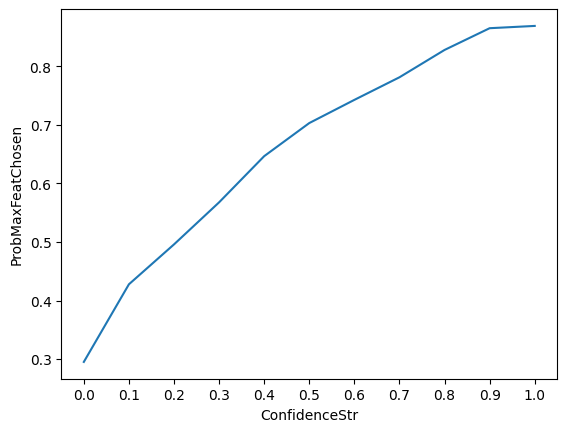

In [8]:
def calc_prob_max_feat_chosen(group):
    return len(group[group.MaxFeatChosen]) / len(group)
prob_max_feat_chosen = res.groupby("ConfidenceStr", group_keys=False).apply(calc_prob_max_feat_chosen).reset_index(name='ProbMaxFeatChosen')
sns.lineplot(prob_max_feat_chosen, x="ConfidenceStr", y="ProbMaxFeatChosen")

In [10]:
calc_prob_max_feat_chosen(res[res.Confidence > res.Confidence.median()])

0.744823647008425

In [44]:
len(res[res.Confidence < res.Confidence.median()]) /len(res)

0.49998215114411165

### how does "confidence" (normalized 1/ feature entropy) change by bin position?

<Axes: xlabel='BlockPositionBin', ylabel='Confidence'>

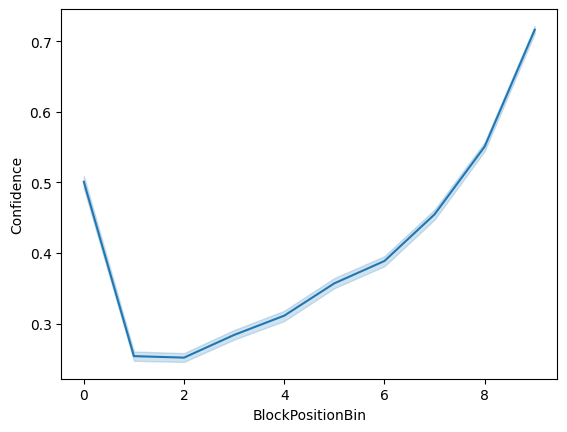

In [7]:
sns.lineplot(res, x="BlockPositionBin", y="Confidence")